## *Maryam Mounad - Muhammad Humza Arain - Mahak Nadeem*

# Exercise 1 - Bias-variance trade-off (6 points)

### 1. Consider a regression problem where the goal is to predict the cap diameter of a mushroom based on its age and stem height. We use a simple linear regression model with two input variables.
$$ y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \epsilon $$
where the input variables represent the age and stem height, and the output is the cap diameter. (each 1 point)


## a) 	What causes the bias of the model? Do you think the bias is high or low?

Bias arises when the model makes such simple assumptions that it basically limits its ability to truly capture the relationship between input features and target variables. In this case, the relationship between age, stem height and cap diameter is linear and other relevant features are ignored. However, the relationship between biological features is non-linear and is often influenced by many other variables (e.g., species, soil pH, vegetation type). Thus the bias is likely high in this case. 

## b)	What causes the variance of the model? Do you think the variance is high or low? 

Variance refers to how much the model’s predictions change when it is trained on different subsets of the data. Since the model has low complexity, its variance is low — even if the training data changes, the estimated coefficients won’t change drastically.

## c)	What causes the irreducible error of the model?  

The irreducible error is caused by inherent randomness and noise in the data, such as measurement errors and unobserved variables that influence cap diameter. This error cannot be eliminated by any model.

### 2. Now consider a classification problem where the goal is to predict the species of a mushroom based on its geographical coordinates and soil pH. (each 1 point)

## a)	What causes the bias of the model? Do you think the bias is high or low?

As we know that the bias is caused by the model assuming that geographical coordinates and soil pH alone are sufficient to distinguish between mushroom species. Since these features are not likely to capture the full complexity of species differences, the bias is likely high.

## b)	What causes the variance of the model? Do you think the variance is high or low?

We know that variance depends on the model’s complexity and sensitivity to data changes. if ones uses a complex model (e.g., decision trees, neural networks) with only two weak predictors, it may try to overfit noise and memorize training data, leading to high variance.
But if one uses a simple model (like logistic regression), the variance might be low, though performance may suffer due to high bias. So depending on the model, the variance could be high.

## c)	How could you trade variance for some bias (or vice versa depending on your answer to the previous questions) without changing the set of input variables? 

we can trade variance for bias by simplifying the model or adding regularization. For example, using a simpler model reduces variance but increases bias. Using a more complex model reduces bias but increases variance.  This can be done without changing the input features.

## Exercise 2 - Machine Learning 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score

In [ ]:
# Load the dataset
dataset = pd.read_csv('schizophrenia_data.csv')
labels = pd.read_csv('schizophrenia_labels.csv')

data = dataset.drop(columns=['Unnamed: 0'])
X = data.values

y = labels['Target'].map({'control': 0, 'schizophrenia': 1}).values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
data.columns


Index(['DDR1', 'RFC2', 'HSPA6', 'PAX8', 'GUCA1A', 'UBA7', 'THRA', 'PTPN21',
       'CCL5', 'CYP2E1',
       ...
       'ACTB.2', 'ACTB.3', 'ACTB.4', 'GAPDH.3', 'GAPDH.4', 'GAPDH.5',
       'STAT1.2', 'STAT1.3', 'STAT1.4', 'STAT1.5'],
      dtype='object', length=21074)

In [ ]:
unpenalized_lr = LogisticRegression(penalty= None,solver='lbfgs',max_iter=1000)

unpenalized_lr.fit(X_train, y_train)

y_train_pred = unpenalized_lr.predict(X_train)
y_test_pred  = unpenalized_lr.predict(X_test)

y_train_prob = unpenalized_lr.predict_proba(X_train)[:, 1]
y_test_prob  = unpenalized_lr.predict_proba(X_test)[:, 1]


In [ ]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]
C_values = [1.0 / lam for lam in lambdas]

models_l1 = {}
for lam, C in zip(lambdas, C_values):
    model = LogisticRegression(
        penalty='l1',
        solver='saga',
        C=C,
        max_iter=2000,
        tol=1e-4
    )
    model.fit(X_train, y_train)
    
    models_l1[lam] = model

In [ ]:
models_l2 = {}
for lam, C in zip(lambdas, C_values):
    model = LogisticRegression(
        penalty='l2',
        solver='lbfgs',
        C=C,
        max_iter=1000,
        tol=1e-4
    )
    model.fit(X_train, y_train)
    
    models_l2[lam] = model

In [ ]:
#Metrics dictionary to capture everything
metrics = {
    'unpenalized': {'train': {}, 'test': {}},
    'l1': {lam: {'train': {}, 'test': {}} for lam in lambdas},
    'l2': {lam: {'train': {}, 'test': {}} for lam in lambdas}}

#npenalized
y_tr_pred = unpenalized_lr.predict(X_train)
y_te_pred = unpenalized_lr.predict(X_test)
y_tr_prob = unpenalized_lr.predict_proba(X_train)[:, 1]
y_te_prob = unpenalized_lr.predict_proba(X_test)[:, 1]

metrics['unpenalized']['train']['accuracy'] = accuracy_score(y_train, y_tr_pred)
metrics['unpenalized']['train']['f1']       = f1_score(y_train, y_tr_pred)
metrics['unpenalized']['train']['auroc']    = roc_auc_score(y_train, y_tr_prob)
metrics['unpenalized']['train']['aupr']     = average_precision_score(y_train, y_tr_prob)

metrics['unpenalized']['test']['accuracy']  = accuracy_score(y_test, y_te_pred)
metrics['unpenalized']['test']['f1']        = f1_score(y_test, y_te_pred)
metrics['unpenalized']['test']['auroc']     = roc_auc_score(y_test, y_te_prob)
metrics['unpenalized']['test']['aupr']      = average_precision_score(y_test, y_te_prob)

#L1‐penalized
for lam, model in models_l1.items():
    y_tr_pred = model.predict(X_train)
    y_te_pred = model.predict(X_test)
    y_tr_prob = model.predict_proba(X_train)[:, 1]
    y_te_prob = model.predict_proba(X_test)[:, 1]
    
    metrics['l1'][lam]['train']['accuracy'] = accuracy_score(y_train, y_tr_pred)
    metrics['l1'][lam]['train']['f1']       = f1_score(y_train, y_tr_pred)
    metrics['l1'][lam]['train']['auroc']    = roc_auc_score(y_train, y_tr_prob)
    metrics['l1'][lam]['train']['aupr']     = average_precision_score(y_train, y_tr_prob)

    metrics['l1'][lam]['test']['accuracy']  = accuracy_score(y_test, y_te_pred)
    metrics['l1'][lam]['test']['f1']        = f1_score(y_test, y_te_pred)
    metrics['l1'][lam]['test']['auroc']     = roc_auc_score(y_test, y_te_prob)
    metrics['l1'][lam]['test']['aupr']      = average_precision_score(y_test, y_te_prob)

#L2‐penalized
for lam, model in models_l2.items():
    y_tr_pred = model.predict(X_train)
    y_te_pred = model.predict(X_test)
    y_tr_prob = model.predict_proba(X_train)[:, 1]
    y_te_prob = model.predict_proba(X_test)[:, 1]
    
    metrics['l2'][lam]['train']['accuracy'] = accuracy_score(y_train, y_tr_pred)
    metrics['l2'][lam]['train']['f1']       = f1_score(y_train, y_tr_pred)
    metrics['l2'][lam]['train']['auroc']    = roc_auc_score(y_train, y_tr_prob)
    metrics['l2'][lam]['train']['aupr']     = average_precision_score(y_train, y_tr_prob)

    metrics['l2'][lam]['test']['accuracy']  = accuracy_score(y_test, y_te_pred)
    metrics['l2'][lam]['test']['f1']        = f1_score(y_test, y_te_pred)
    metrics['l2'][lam]['test']['auroc']     = roc_auc_score(y_test, y_te_prob)
    metrics['l2'][lam]['test']['aupr']      = average_precision_score(y_test, y_te_prob)


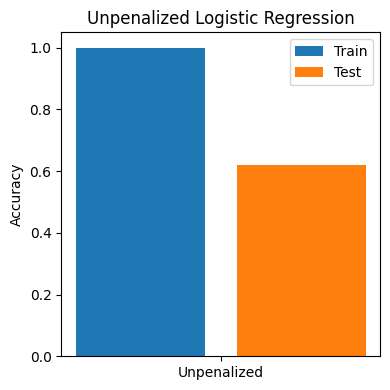

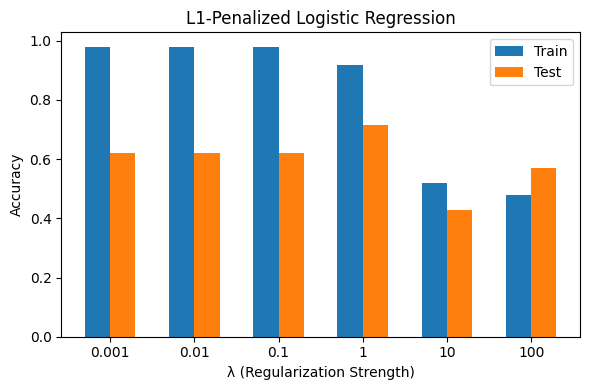

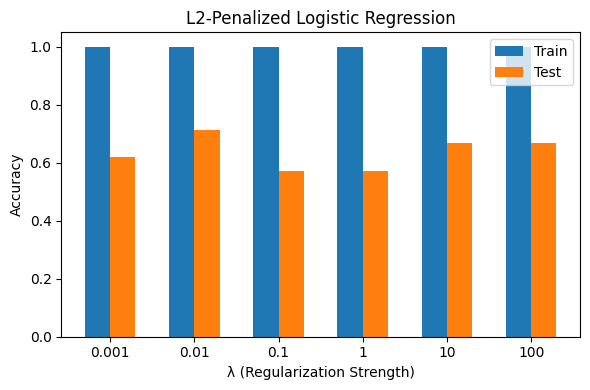

In [ ]:
#Unpenalized barplot
fig, ax = plt.subplots(figsize=(4, 4))
train_acc = metrics['unpenalized']['train']['accuracy']
test_acc  = metrics['unpenalized']['test']['accuracy']

ax.bar([0], [train_acc], width=0.4, label='Train', color='tab:blue')
ax.bar([0.5], [test_acc], width=0.4, label='Test',  color='tab:orange')

ax.set_xticks([0.25])
ax.set_xticklabels(['Unpenalized'])
ax.set_ylabel('Accuracy')
ax.set_title('Unpenalized Logistic Regression')
ax.legend()
plt.tight_layout()
plt.show()

#L1‐penalized barplot
fig, ax = plt.subplots(figsize=(6, 4))
x = np.arange(len(lambdas))  # indices 0..5

train_vals_l1 = [metrics['l1'][lam]['train']['accuracy'] for lam in lambdas]
test_vals_l1  = [metrics['l1'][lam]['test']['accuracy']  for lam in lambdas]

ax.bar(x - 0.15, train_vals_l1, width=0.3, label='Train', color='tab:blue')
ax.bar(x + 0.15, test_vals_l1,  width=0.3, label='Test',  color='tab:orange')

ax.set_xticks(x)
ax.set_xticklabels([str(lam) for lam in lambdas])
ax.set_xlabel('λ (Regularization Strength)')
ax.set_ylabel('Accuracy')
ax.set_title('L1‐Penalized Logistic Regression')
ax.legend()
plt.tight_layout()
plt.show()

#L2‐penalized barplot
fig, ax = plt.subplots(figsize=(6, 4))
train_vals_l2 = [metrics['l2'][lam]['train']['accuracy'] for lam in lambdas]
test_vals_l2  = [metrics['l2'][lam]['test']['accuracy']  for lam in lambdas]

ax.bar(x - 0.15, train_vals_l2, width=0.3, label='Train', color='tab:blue')
ax.bar(x + 0.15, test_vals_l2,  width=0.3, label='Test',  color='tab:orange')

ax.set_xticks(x)
ax.set_xticklabels([str(lam) for lam in lambdas])
ax.set_xlabel('λ (Regularization Strength)')
ax.set_ylabel('Accuracy')
ax.set_title('L2‐Penalized Logistic Regression')
ax.legend()
plt.tight_layout()
plt.show()


from the plots we can say that the best on test‐set Method is L1 with λ = 1 or L2 with λ = 0.01

In [ ]:
best_l1_test = max((metrics['l1'][lam]['test']['accuracy'], lam) for lam in lambdas)

best_l2_test = max((metrics['l2'][lam]['test']['accuracy'], lam) for lam in lambdas)

print(best_l1_test, best_l2_test)

(0.7142857142857143, 1) (0.7142857142857143, 0.01)


# Exercise 03 VC dimension (6 points)

# a) Class of thresholds in R (points above the threshold are classified as one) (1 point)

For the hypothesis class of one‐dimensional thresholds on R (where a point x is labeled “1” if x>t and “0” otherwise), the VC dimension is dvc=1




Below is a sketch using matplotlib of the real line, one data point at  x=0.6, and two possible thresholds that realize the two 
labelings of that point.

Data point:  x=0.6 (blue “×”)

Threshold  t=0.3 (dashed red line):

Since 0.6>0.3, this classifier labels the point as 1 (“positive”).

Threshold  t=0.9 (dashed red line):

Since 0.6<0.9, this classifier labels the point as 0 (“negative”).

These two thresholds witness that the single point can be labeled arbitrarily—and hence is shattered—demonstrating 

dvc=1.


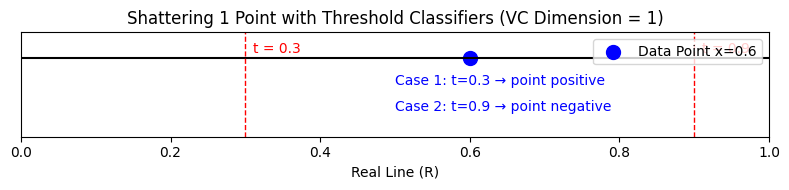

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 2))
plt.hlines(1, 0, 1, color='black')  # horizontal line representing real line
plt.scatter([0.6], [1], color='blue', s=100, label='Data Point x=0.6')

# Draw threshold positions
thresholds = [0.3, 0.9]
for t in thresholds:
    plt.axvline(x=t, color='red', linestyle='--', linewidth=1)
    plt.text(t + 0.01, 1.02, f't = {t}', color='red')

# Annotations for classification regions
plt.text(0.5, 0.9, 'Case 1: t=0.3 → point positive', color='blue')
plt.text(0.5, 0.8, 'Case 2: t=0.9 → point negative', color='blue')

plt.yticks([])
plt.ylim(0.7, 1.1)
plt.xlim(0, 1)
plt.xlabel('Real Line (R)')
plt.title('Shattering 1 Point with Threshold Classifiers (VC Dimension = 1)')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


# b) 	Class of intervals in R (points within the interval are classified as one) (1 point)

For the hypothesis class of intervals on R (where a point x is classified as “1” if it lies inside some interval [a,b] and “0 otherwise),

dvc  = 2.

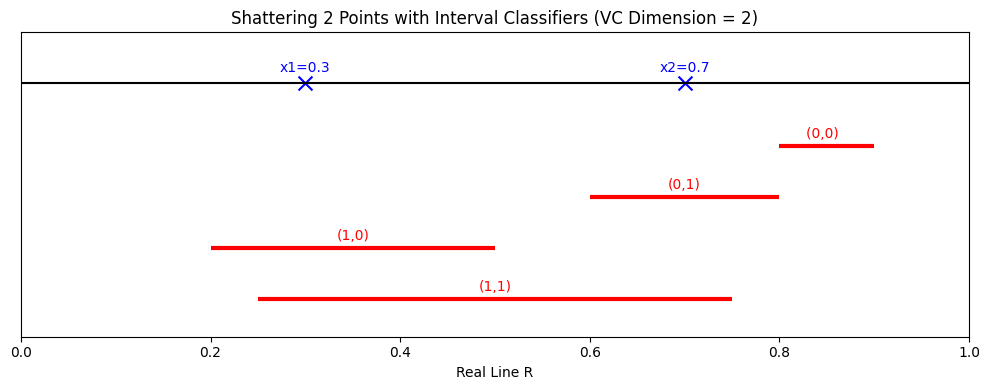

In [ ]:


# Points and intervals for illustrating shattering of two points
x_values = [0.3, 0.7]
y_point = 1.0  # y-coordinate for points

# Interval endpoints and vertical positions for different labelings
intervals = [
    {'range': (0.8, 0.9), 'y': 0.75, 'label': '(0,0)  '},  # covers neither point
    {'range': (0.6, 0.8), 'y': 0.55, 'label': '(0,1)'},     # covers only x2
    {'range': (0.2, 0.5), 'y': 0.35, 'label': '(1,0)'},     # covers only x1
    {'range': (0.25, 0.75), 'y': 0.15, 'label': '(1,1)'},   # covers both points
]

plt.figure(figsize=(10, 4))
# Plot the real line as a thick black line
plt.hlines(y_point, 0, 1, color='black')

# Plot the two points
plt.scatter(x_values, [y_point, y_point], color='blue', s=100, marker='x', label='Data Points')

# Draw each interval as a red horizontal line at different y-levels
for interval in intervals:
    x_start, x_end = interval['range']
    y = interval['y']
    plt.hlines(y, x_start, x_end, color='red', linewidth=3)
    plt.text((x_start + x_end)/2, y + 0.02, interval['label'], ha='center', va='bottom', color='red')

# Annotate x1, x2
plt.text(0.3, y_point + 0.03, 'x1=0.3', ha='center', va='bottom', color='blue')
plt.text(0.7, y_point + 0.03, 'x2=0.7', ha='center', va='bottom', color='blue')

# Formatting
plt.yticks([])  # Hide y-axis ticks
plt.ylim(0, 1.2)
plt.xlim(0, 1)
plt.xlabel('Real Line R')
plt.title('Shattering 2 Points with Interval Classifiers (VC Dimension = 2)')
plt.tight_layout()
plt.show()


# c) 	Class of axis-aligned rectangle in R^2(points within the rectangle are classified as one) (2 points)

# VC-Dimension of Axis-Aligned Rectangles in $ R^2 $

The VC-dimension of the hypothesis class:

$$
H = \{ h_{[a,b] \times [c,d]}: \mathbb{R}^2 \to \{0,1\} \mid [a,b] \times [c,d] \text{ is an axis-aligned rectangle} \}
$$

where:

$$
h_{[a,b] \times [c,d]}(x,y) =
\begin{cases} 
1, & (x,y) \in [a,b] \times [c,d] \\
0, & \text{otherwise}
\end{cases}
$$

is given by:

$$
d_{VC} = 4.
$$


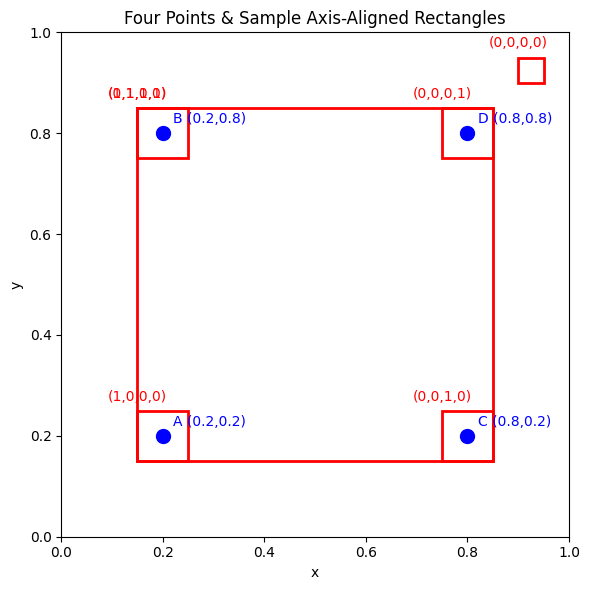

In [ ]:


# Define the four points (corners of a square)
points = [(0.2, 0.2), (0.2, 0.8), (0.8, 0.2), (0.8, 0.8)]
labels = ['A (0.2,0.2)', 'B (0.2,0.8)', 'C (0.8,0.2)', 'D (0.8,0.8)']

# Define a few example rectangles for different labelings
# Format: ((xmin, ymin), (xmax, ymax), label)
rectangles = [
    ((0.9, 0.9), (0.95, 0.95), '(0,0,0,0)'),   # covers none
    ((0.15, 0.15), (0.25, 0.25), '(1,0,0,0)'),  # covers only A
    ((0.15, 0.75), (0.25, 0.85), '(0,1,0,0)'),  # covers only B
    ((0.75, 0.15), (0.85, 0.25), '(0,0,1,0)'),  # covers only C
    ((0.75, 0.75), (0.85, 0.85), '(0,0,0,1)'),  # covers only D
    ((0.15, 0.15), (0.85, 0.85), '(1,1,1,1)'),  # covers all four
]

plt.figure(figsize=(6, 6))

# Plot the points
for (x, y), label in zip(points, labels):
    plt.scatter(x, y, color='blue', s=100)
    plt.text(x + 0.02, y + 0.02, label, color='blue')

# Plot each rectangle in red
for (xmin, ymin), (xmax, ymax), lbl in rectangles:
    rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, edgecolor='red', linewidth=2)
    plt.gca().add_patch(rect)
    plt.text(xmin, ymax + 0.02, lbl, color='red', ha='center')

# Formatting
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Four Points & Sample Axis-Aligned Rectangles') 
plt.tight_layout()
plt.show()


# 	Class of circles in R^2 (points within the circle are classified as one) (2 points)

For the hypothesis class of circles in $ R^2 $ (where each classifier is “1” inside some circle and “0” outside),

dvc = 3






To prove that the VC-dimension is at least 3, we choose **three non-collinear points**:

$$
A = (0.2, 0.2), \quad B = (0.8, 0.2), \quad C = (0.5, 0.8)
$$

Since these points do **not** lie on a single line, there always exists a **circle** that can include **exactly** any subset of these three.

## **Demonstrating Shattering**
We must show that for every possible labeling of \( (A, B, C) \), we can find a corresponding circle.

### **Labeling Examples and Corresponding Circles**
1. **Label (0,0,0):** Pick a **tiny circle far away**, e.g., centered at \( (0.9, 0.9) \) with radius **0.05**. It covers none of \( \{A, B, C\} \).

2. **Label (1,0,0):** (Only \( A \) positive)  
   - A circle of radius **0.1**, centered at \( (0.2, 0.2) \), encloses \( A \) but **misses** \( B \) and \( C \).

3. **Label (0,1,0):** (Only \( B \) positive)  
   - A circle of radius **0.1**, centered at \( (0.8, 0.2) \), encloses \( B \) alone.

4. **Label (0,0,1):** (Only \( C \) positive)  
   - A circle of radius **0.1**, centered at \( (0.5, 0.8) \), encloses \( C \) alone.

5. **Label (1,1,0):** (Both \( A \) and \( B \) positive, \( C \) negative)  
   - A circle centered at \( (0.5, 0.2) \) with radius **0.35** covers \( A \) and \( B \), but **misses** \( C \).

6. **Label (1,0,1):** (Both \( A \) and \( C \) positive, \( B \) negative)  
   - A circle roughly centered at \( (0.35, 0.5) \) with radius **0.30** covers \( A \) and \( C \) while **excluding** \( B \).

7. **Label (0,1,1):** (Both \( B \) and \( C \) positive, \( A \) negative)  
   - A circle roughly centered at \( (0.65, 0.5) \) with radius **0.30** covers \( B \) and \( C \) but **misses** \( A \).

8. **Label (1,1,1):** (All three positive)  
   - A circle centered at \( (0.50, 0.45) \) with radius **0.45** covers **all three points** \( A, B, C \).

## **Conclusion**
Since every **\( 2^3 = 8 \)** possible labelings of \( \{A, B, C\} \) can be realized by an appropriate **circle**, this set of three points is **shattered**.

Thus, we conclude:

$$
d_{VC} \geq 3
$$


​
 


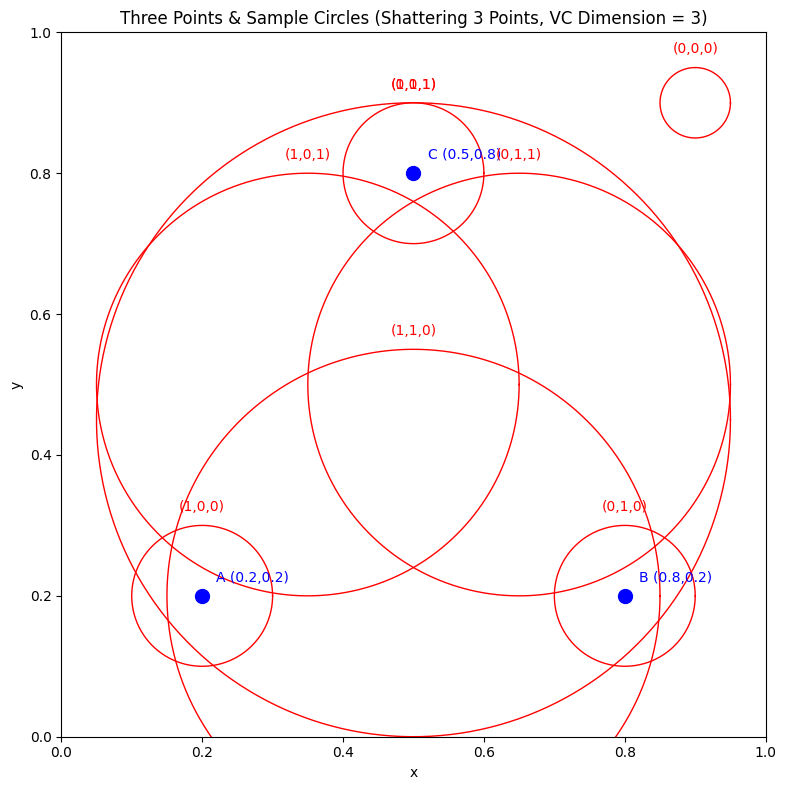

In [ ]:


# Define the three points (non-collinear)
points = [(0.2, 0.2), (0.8, 0.2), (0.5, 0.8)]
labels = ['A (0.2,0.2)', 'B (0.8,0.2)', 'C (0.5,0.8)']

# Define circles for different label patterns
# Each circle is (center_x, center_y, radius, label)
circles = [
    (0.9, 0.9, 0.05, '(0,0,0)'),      # covers none
    (0.2, 0.2, 0.1, '(1,0,0)'),      # covers only A
    (0.8, 0.2, 0.1, '(0,1,0)'),      # covers only B
    (0.5, 0.8, 0.1, '(0,0,1)'),      # covers only C
    (0.5, 0.2, 0.35, '(1,1,0)'),     # covers A and B, not C
    (0.35, 0.5, 0.3, '(1,0,1)'),     # covers A and C, not B
    (0.65, 0.5, 0.3, '(0,1,1)'),     # covers B and C, not A
    (0.5, 0.45, 0.45, '(1,1,1)'),    # covers A, B, C
]

plt.figure(figsize=(8, 8))

# Plot the three points
for (x, y), label in zip(points, labels):
    plt.scatter(x, y, color='blue', s=100)
    plt.text(x + 0.02, y + 0.02, label, color='blue')

# Draw each circle
theta = np.linspace(0, 2 * np.pi, 200)
for cx, cy, r, lbl in circles:
    xs = cx + r * np.cos(theta)
    ys = cy + r * np.sin(theta)
    plt.plot(xs, ys, color='red', linewidth=1)
    # Position the label near the top of each circle
    plt.text(cx, cy + r + 0.02, lbl, color='red', ha='center')

# Formatting
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Three Points & Sample Circles (Shattering 3 Points, VC Dimension = 3)')
plt.gca().set_aspect('equal', 'box')
plt.tight_layout()
plt.show()
